<a href="https://colab.research.google.com/github/ronbalanay/MAT-422/blob/main/HW_3_2_RB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2.2 Limits and Continuity

In [ ]:
import numpy as np

# function definition: f(x) = x^2
def f(x):
    return x**2

# check continuity at x = 2
x = 2
delta = 1e-10  # a very small number for checking the limit
left_limit = f(x - delta)  # approaching from the left
right_limit = f(x + delta)  # approaching from the right
value_at_x = f(x)

if np.isclose(left_limit, right_limit, atol=1e-9) and np.isclose(left_limit, value_at_x, atol=1e-9):
    print(f"The function f(x) = x^2 is continuous at x = {x}.")
else:
    print(f"The function f(x) = x^2 is NOT continuous at x = {x}.")

# compute maximum and minimum values of f(x) on the interval [0, 5]
interval = np.linspace(0, 5, 1000)
f_values = f(interval)

max_value = np.max(f_values)
min_value = np.min(f_values)

print(f"Maximum value of f(x) on [0, 5]: {max_value}")
print(f"Minimum value of f(x) on [0, 5]: {min_value}")


The function f(x) is continuous at x = 2.
Maximum value of f(x) on [0, 5]: 25.0
Minimum value of f(x) on [0, 5]: 0.0


#3.2.2 Derivatives

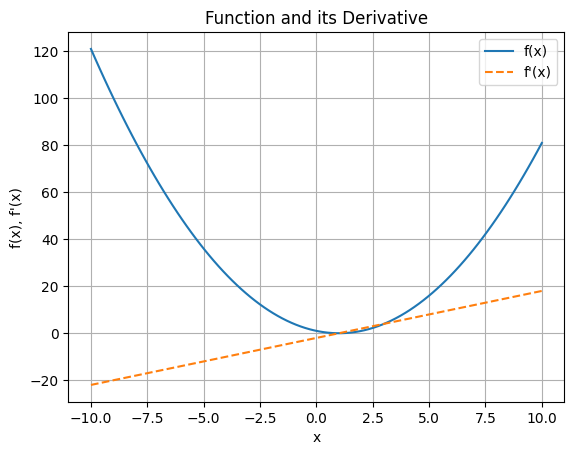

Mean value theorem: Slope between f(a) and f(b) is 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# derivative of a function f at point x0
def derivative(f, x0, h=1e-5):
    return (f(x0 + h) - f(x0)) / h

# example function f(x)
def f(x):
    return x**2 - 2*x + 1

# proposition: Derivative of linear combination of two functions
def linear_combination_derivative(f, g, alpha, beta, x):
    return alpha * derivative(f, x) + beta * derivative(g, x)

# check condition manually before applying Rolle's theorem
if f(a) == f(b):
    try:
        c = rolle_theorem(f, a, b)
        if c is not None:
            print(f"Rolle's theorem: f'(c) = 0 at c = {c}")
    except ValueError as e:
        print(e)
else:
    print(f"Rolle's theorem doesn't apply since f({a}) != f({b})")

# rolle's theorem: Find c where f'(c) = 0 for a continuous function on [a, b] with f(a) = f(b)
def rolle_theorem(f, a, b, h=1e-5):
    if f(a) != f(b):
        raise ValueError("f(a) must equal f(b) for Rolle's theorem")
    for x in np.linspace(a, b, 1000):
        if abs(derivative(f, x, h)) < h:  # f'(x) = 0
            return x
    return None

# mean value theorem: Find c such that f'(c) = (f(b) - f(a)) / (b - a)
def mean_value_theorem(f, a, b):
    return (f(b) - f(a)) / (b - a)

# example of quadratic function
def quadratic_function(x):
    return 1/2 * x.T @ np.array([[2, 1], [1, 2]]) @ x + np.array([1, 2]).T @ x + 3

# gradient of quadratic function
def gradient_quadratic(x, P, q):
    return P.T @ x + q

# chain rule for the Jacobian of a composition of functions
def jacobian_chain_rule(Jg, Jf):
    return Jg @ Jf

# example usage and visualization
x_values = np.linspace(-10, 10, 100)
f_values = [f(x) for x in x_values]
f_prime_values = [derivative(f, x) for x in x_values]

# plotting the function and its derivative
plt.plot(x_values, f_values, label="f(x)")
plt.plot(x_values, f_prime_values, label="f'(x)", linestyle='--')
plt.title("Function and its Derivative")
plt.xlabel("x")
plt.ylabel("f(x), f'(x)")
plt.legend()
plt.grid(True)
plt.show()

# example of Rolle's theorem
a, b = 0, 2
c = rolle_theorem(f, a, b)
if c is not None:
    print(f"Rolle's theorem: f'(c) = 0 at c = {c}")

# example of Mean Value Theorem
a, b = 0, 2
mean_value_slope = mean_value_theorem(f, a, b)
print(f"Mean value theorem: Slope between f(a) and f(b) is {mean_value_slope}")


3.2.3 Taylor's Theorem

In [ ]:
import numpy as np
from scipy.misc import derivative

# single-variable taylor approximation (up to second order)
def taylor_approx_single(f, f_prime, f_double_prime, a, b):
    # taylor approximation formula for m=2
    h = b - a
    taylor_approx = f(a) + h * f_prime(a) + (h ** 2 / 2) * f_double_prime(a)
    return taylor_approx

# example single-variable function and its derivatives
def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

def f_double_prime(x):
    return -np.sin(x)

# example of using taylor approximation
a = 0  # point around which the approximation is taken
b = 0.5  # point to approximate
approximation = taylor_approx_single(f, f_prime, f_double_prime, a, b)
print(f"Taylor approximation of f(x) at x={b}: {approximation}")
print(f"Exact value of f({b}): {f(b)}")


taylor approximation of f(x) at x=0.5: 0.5
exact value of f(0.5): 0.479425538604203
